In [1]:
import pandas as pd

housing_df = pd.read_csv("./Housing.csv")
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
columns_to_convert_bool_to_bit = ["mainroad","guestroom","basement","hotwaterheating", "airconditioning","prefarea"]

for item in columns_to_convert_bool_to_bit:
    housing_df[item] = housing_df.get(item).map({"yes": 1, "no": 0})

In [6]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
status = pd.get_dummies(housing_df["furnishingstatus"],drop_first=True)
status

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [9]:
housing_df = pd.concat([housing_df, status], axis=1)
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,False,False


In [13]:
housing_df.drop(["furnishingstatus"], axis=1, inplace=True)

In [14]:
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [15]:
housing.mean()

NameError: name 'housing' is not defined

In [16]:
housing_df.mean()

price              4.766729e+06
area               5.150541e+03
bedrooms           2.965138e+00
bathrooms          1.286239e+00
stories            1.805505e+00
mainroad           8.587156e-01
guestroom          1.779817e-01
basement           3.504587e-01
hotwaterheating    4.587156e-02
airconditioning    3.155963e-01
parking            6.935780e-01
prefarea           2.348624e-01
semi-furnished     4.165138e-01
unfurnished        3.266055e-01
dtype: float64

In [17]:
housing_df.std()

price              1.870440e+06
area               2.170141e+03
bedrooms           7.380639e-01
bathrooms          5.024696e-01
stories            8.674925e-01
mainroad           3.486347e-01
guestroom          3.828487e-01
basement           4.775519e-01
hotwaterheating    2.093987e-01
airconditioning    4.651799e-01
parking            8.615858e-01
prefarea           4.243022e-01
semi-furnished     4.934337e-01
unfurnished        4.694024e-01
dtype: float64

In [20]:
housing_df_std = (housing_df - housing_df.mean()) / housing_df.std()

In [21]:
housing_df_std

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.695790
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.695790
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.695790
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.695790
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.695790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.575421,-0.990968,-1.307661,-0.569663,-0.928544,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,-0.553526,-0.844113,1.434578
541,-1.603676,-1.267448,0.047235,-0.569663,-0.928544,-2.463081,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526,1.182502,-0.695790
542,-1.612845,-0.705273,-1.307661,-0.569663,-0.928544,0.405251,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526,-0.844113,1.434578
543,-1.612845,-1.032440,0.047235,-0.569663,-0.928544,-2.463081,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526,-0.844113,-0.695790


In [22]:
X = housing_df_std["area"]

y = housing_df_std["price"]

In [23]:
X

0      1.045766
1      1.755397
2      2.216196
3      1.082630
4      1.045766
         ...   
540   -0.990968
541   -1.267448
542   -0.705273
543   -1.032440
544   -0.599289
Name: area, Length: 545, dtype: float64

In [24]:
y

0      4.562174
1      4.000809
2      4.000809
3      3.982096
4      3.551716
         ...   
540   -1.575421
541   -1.603676
542   -1.612845
543   -1.612845
544   -1.612845
Name: price, Length: 545, dtype: float64

In [27]:
import numpy as np

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
# implement gradient descent algorithm

In [48]:
def gradient(X,y,iters=1000, m_current = 0, c_current = 0, alpha= 0.01):
    N = len(y)
    df = pd.DataFrame(columns=['m_current','c_current','Loss'])
    for i in range(iters):
        y_pred = m_current * X  + c_current
        J = np.sum(( y - y_pred)**2) / N
        deltaJ_deltam = (-2 / N) * np.sum(X * (y - y_pred))
        deltaJ_deltac = (-2 / N) * (np.sum(y - y_pred))
        m_current = m_current - alpha * deltaJ_deltam
        c_current = c_current - alpha * deltaJ_deltac
        df.loc[i] = [m_current, c_current, J]
    return df

In [49]:
gradient = gradient(X,y,2000)

gradient

,m_current,c_current,Loss
0,0.010700,2.085997e-18,0.998165
1,0.021187,6.257991e-18,0.986830
2,0.031464,9.386987e-18,0.975943
3,0.041536,1.251598e-17,0.965486
4,0.051407,1.564498e-17,0.955442
...,...,...,...
1995,0.535997,2.784806e-16,0.711399
1996,0.535997,2.784806e-16,0.711399
1997,0.535997,2.784806e-16,0.711399
1998,0.535997,2.784806e-16,0.711399


In [45]:
gradient.loc[gradient.index > 950]

,m_current,c_current,Loss
951,0.535997,2.784806e-16,0.711399
952,0.535997,2.774376e-16,0.711399
953,0.535997,2.774376e-16,0.711399
954,0.535997,2.774376e-16,0.711399
955,0.535997,2.774376e-16,0.711399
956,0.535997,2.784806e-16,0.711399
957,0.535997,2.763946e-16,0.711399
958,0.535997,2.763946e-16,0.711399
959,0.535997,2.774376e-16,0.711399
960,0.535997,2.774376e-16,0.711399


<Axes: xlabel='index'>

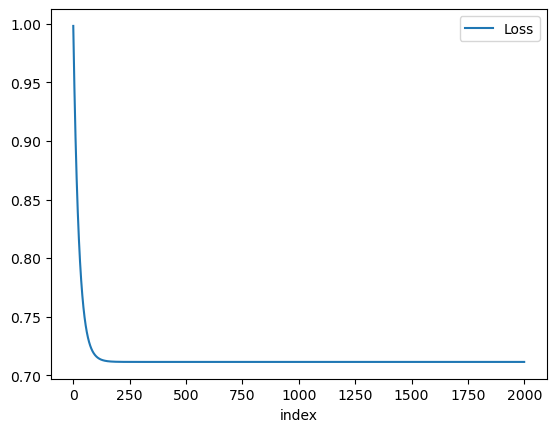

In [54]:
gradient.reset_index().plot.line(x="index", y = "Loss")

# Multivariate Linear Regression

In [58]:
X = housing_df_std[["area", "bedrooms"]]

y = housing_df_std["price"]

In [59]:
X

,area,bedrooms
0,1.045766,1.402131
1,1.755397,1.402131
2,2.216196,0.047235
3,1.082630,1.402131
4,1.045766,1.402131
...,...,...
540,-0.990968,-1.307661
541,-1.267448,0.047235
542,-0.705273,-1.307661
543,-1.032440,0.047235


In [60]:
X["intercept"] = 1

C:\Users\Max\AppData\Local\Temp\ipykernel_13708\3000068858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1


In [61]:
X

,area,bedrooms,intercept
0,1.045766,1.402131,1
1,1.755397,1.402131,1
2,2.216196,0.047235,1
3,1.082630,1.402131,1
4,1.045766,1.402131,1
...,...,...,...
540,-0.990968,-1.307661,1
541,-1.267448,0.047235,1
542,-0.705273,-1.307661,1
543,-1.032440,0.047235,1


In [62]:
X = X.reindex(columns=['intercept', 'area', 'bedrooms'])

In [63]:
X

,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131
...,...,...,...
540,1,-0.990968,-1.307661
541,1,-1.267448,0.047235
542,1,-0.705273,-1.307661
543,1,-1.032440,0.047235


In [64]:
X = np.array(X)
y = np.array(y)

In [69]:
X.shape
np.zeros(X.shape[1])

array([0., 0., 0.])

In [ ]:
def gradient(X, y, iters = 1000, alpha = 0.01)
    theta = np.zeroes(X.shape[1])
    df = pd.DataFrame(column = ["weights" , "loss"])
    for i in range(iters):
        J = compute_cost(X,y, theta)